<a href="https://colab.research.google.com/github/Aakankshavr/MachineLearning/blob/main/1BM22CS001_MLlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns with NaNs:
['Unnamed: 32']
Columns with NaNs have been dropped.
Accuracy: 0.9860
Confusion Matrix:


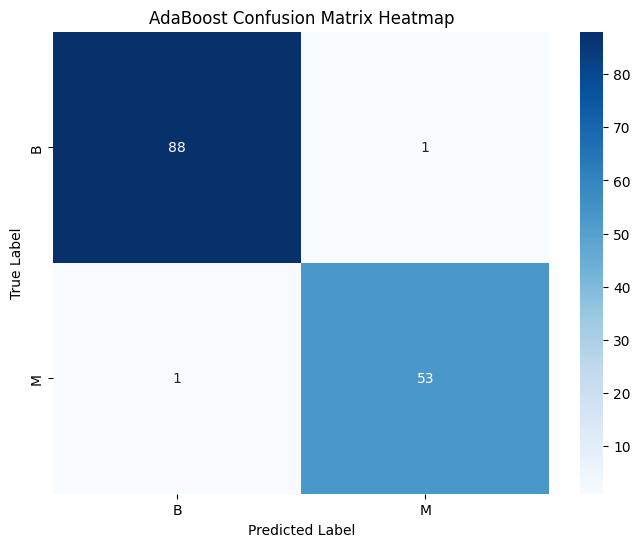

In [8]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


try:
    df = pd.read_csv('Cancer_Data.csv')
except FileNotFoundError:
    print("Error: 'Cancer_Data.csv' not found. Please upload the file.")
    exit()


if 'diagnosis' not in df.columns:
    print("Error: 'diagnosis' column not found in the dataset.")
    exit()


X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


le = LabelEncoder()
y = le.fit_transform(y)

X = X.select_dtypes(include=['number'])


X = X.fillna(X.mean())


if X.isnull().sum().sum() > 0:


    print("Columns with NaNs:")
    print(X.columns[X.isnull().any()].tolist())

    X = X.dropna(axis=1)
    print("Columns with NaNs have been dropped.")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# AdaBoost Classifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)


adaboost.fit(X_train, y_train)


y_pred = adaboost.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
conf_matrix


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('AdaBoost Confusion Matrix Heatmap')
plt.show()

Columns with NaNs:
['Unnamed: 32']
Columns with NaNs have been dropped.
Logistic Regression Accuracy: 0.9510
Logistic Regression Confusion Matrix:
[[87  2]
 [ 5 49]]


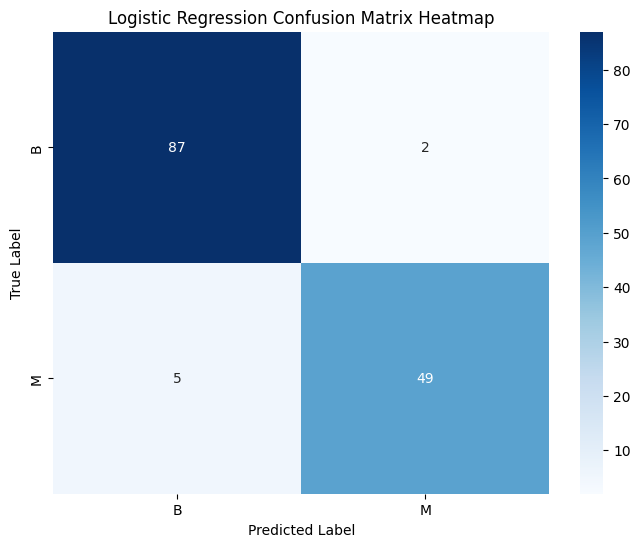

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns



try:
    df = pd.read_csv('Cancer_Data.csv')
except FileNotFoundError:
    print("Error: 'Cancer_Data.csv' not found. Please upload the file.")
    exit()


if 'diagnosis' not in df.columns:
    print("Error: 'diagnosis' column not found in the dataset.")
    exit()


X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


le = LabelEncoder()
y = le.fit_transform(y)

X = X.select_dtypes(include=['number'])


X = X.fillna(X.mean())


if X.isnull().sum().sum() > 0:

    print("Columns with NaNs:")
    print(X.columns[X.isnull().any()].tolist())

    X = X.dropna(axis=1)
    print("Columns with NaNs have been dropped.")



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


logistic_regression = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression.fit(X_train, y_train)


y_pred_lr = logistic_regression.predict(X_test)


accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_lr)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix Heatmap')
plt.show()